In [1]:
#!/usr/bin/env python3
############################
#
# template by M Joyce
# for use with Smith College students
#
############################
import numpy as np
import matplotlib.pyplot as plt

import scipy
from scipy import stats
from scipy.stats import norm

print("modules imported")


modules imported


In [2]:
def set_fig(ax):
    ax.tick_params(axis = 'both',which='both', width=2)
    ax.tick_params(axis = 'both',which='major', length=12)
    ax.tick_params(axis = 'both',which='minor', length=8, color='black')
    ax.tick_params(axis='both', which='major', labelsize=24)
    ax.tick_params(axis='both', which='minor', labelsize=20)
    return 

print("plot settings function defined")

plot settings function defined


In [3]:
data_file = 'stellar_ages.dat'
Joyce_ages, Bensby_ages= np.loadtxt(data_file, usecols=(0,1), unpack = True)

(Jmu, Jsigma) = norm.fit(Joyce_ages)
(Bmu, Bsigma) = norm.fit(Bensby_ages)

Jstats=r'$\mu=$' + "%.2f"%Jmu + ';'+r' $\sigma=$' + "%.2f"%Jsigma
Bstats=r'$\mu=$' + "%.2f"%Bmu + ';'+r' $\sigma=$' + "%.2f"%Bsigma

print("ages successfully read in")


ages successfully read in


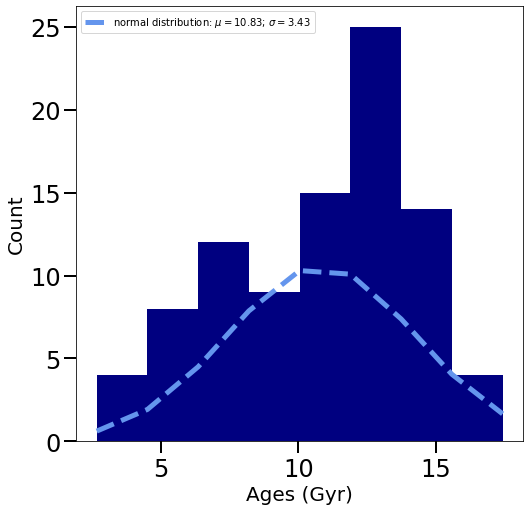

In [4]:
fig, ax = plt.subplots(figsize = (8,8))
set_fig(ax)

n, bins, patches = plt.hist(Joyce_ages,  bins='auto', alpha = 1, color= 'navy')

y = scipy.stats.norm.pdf(bins, Jmu, Jsigma)*len(Joyce_ages)
plt.plot(bins, y, '--', color='cornflowerblue', linewidth=5, label='normal distribution: '+Jstats)

plt.xlabel('Ages (Gyr)', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.legend(loc=2)


Text(0, 0.5, 'Kernel Density Estimate')

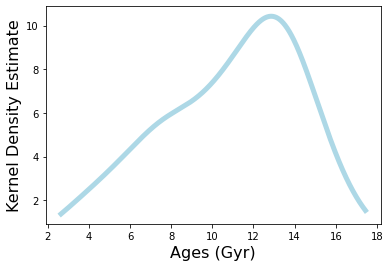

In [5]:
idx_array = np.linspace(min(Joyce_ages), max(Joyce_ages), 1000)
kde = stats.gaussian_kde(Joyce_ages)
plt.plot(idx_array, kde(idx_array)*len(Joyce_ages), linewidth=5, linestyle='-', color='lightblue', label='KDE')

plt.xlabel('Ages (Gyr)', fontsize=16)
plt.ylabel('Kernel Density Estimate', fontsize=16)

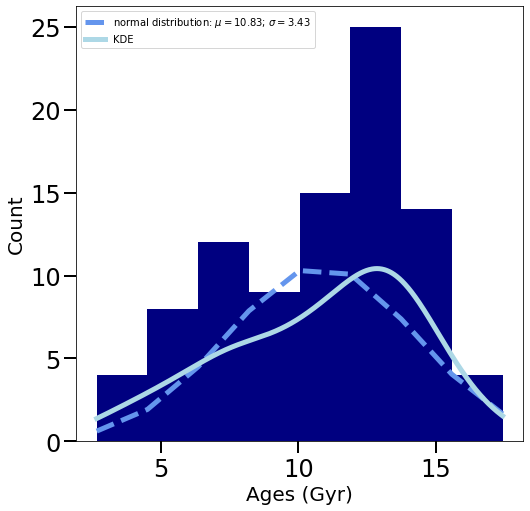

In [6]:
fig, ax = plt.subplots(figsize = (8,8))
set_fig(ax)

plt.hist(Joyce_ages,  bins='auto', alpha = 1, color= 'navy')
plt.plot(bins, y, '--', color='cornflowerblue', linewidth=5, label='normal distribution: '+Jstats)
plt.plot(idx_array, kde(idx_array)*len(Joyce_ages), linewidth=5, linestyle='-', color='lightblue', label='KDE')

plt.xlabel('Ages (Gyr)', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.legend(loc=2)

(array([ 3.,  8.,  9., 14., 17., 27.,  9.,  4.]),
 array([ 4.45917364,  6.05923206,  7.65929048,  9.2593489 , 10.85940732,
        12.45946574, 14.05952416, 15.65958257, 17.25964099]),
 <BarContainer object of 8 artists>)

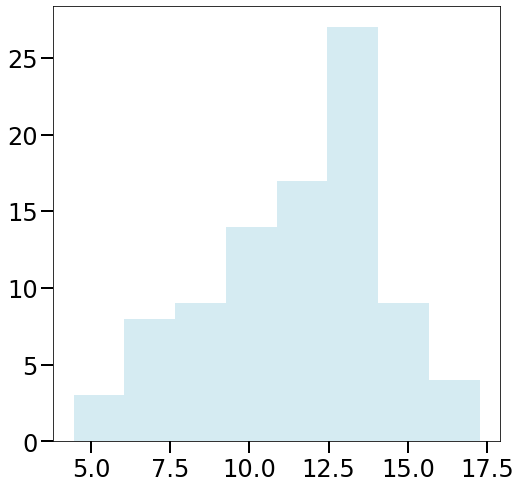

In [7]:
########################################
#
# resampling 
#
########################################
import sklearn
from sklearn.neighbors import KernelDensity

kde1 = KernelDensity(bandwidth=1).fit(Joyce_ages.reshape(-1, 1))
y1 = kde1.sample(91)

fig, ax = plt.subplots(figsize = (8,8))
set_fig(ax)
ax.hist(y1,          bins=8, density=False, color='lightblue', alpha=0.5, label=r'distribution drawn from $h = 1$')


(array([ 7.,  6., 12., 10., 12., 25., 17.,  2.]),
 array([ 3.28641891,  5.06425932,  6.84209973,  8.61994014, 10.39778055,
        12.17562096, 13.95346137, 15.73130178, 17.50914219]),
 <BarContainer object of 8 artists>)

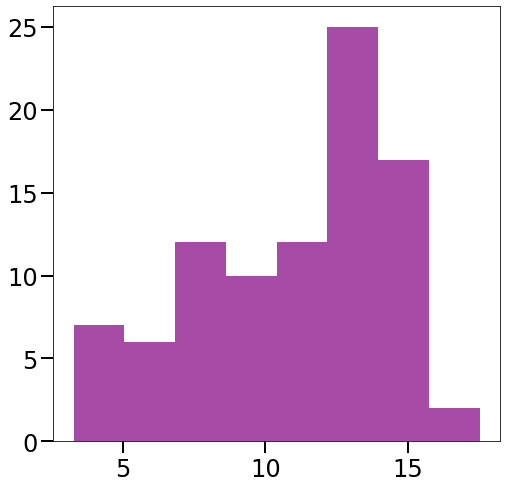

In [8]:
kde2 = KernelDensity(bandwidth=0.1).fit(Joyce_ages.reshape(-1, 1))
y2 = kde2.sample(91)

fig, ax = plt.subplots(figsize = (8,8))
set_fig(ax)
ax.hist(y2, 		 bins=8, density=False, color='purple',    alpha=0.7, label=r'distribution drawn from $h = 0.1$')


(array([ 7.,  3., 12., 12., 14., 19., 19.,  5.]),
 array([ 2.64686209,  4.42636985,  6.20587761,  7.98538536,  9.76489312,
        11.54440087, 13.32390863, 15.10341638, 16.88292414]),
 <BarContainer object of 8 artists>)

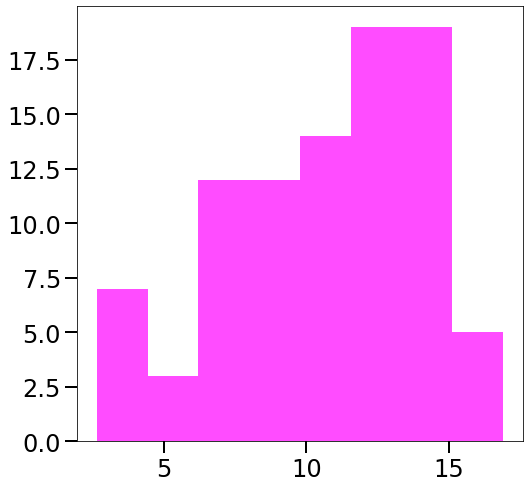

In [9]:
kde3 = KernelDensity(bandwidth=0.01).fit(Joyce_ages.reshape(-1, 1))
y3 = kde3.sample(91)

fig, ax = plt.subplots(figsize = (8,8))
set_fig(ax)
ax.hist(y3, 		 bins=8, density=False, color='magenta',   alpha=0.7, label=r'distribution drawn from $h = 0.01$')

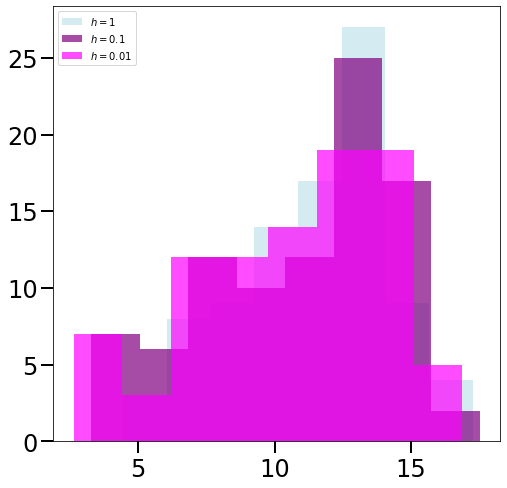

In [10]:
fig, ax = plt.subplots(figsize = (8,8))
set_fig(ax)

#ax.plot(idx_array, y1, color='lightblue', label='KDE 1')
#ax.hist(y1_resample, bins=8, density=False, color='lightblue', alpha=0.5, label=r'KDE 1 resampled; $h=auto$') ## set density = False
ax.hist(y1,          bins=8, density=False, color='lightblue', alpha=0.5, label=r'$h = 1$')
ax.hist(y2, 		 bins=8, density=False, color='purple',    alpha=0.7, label=r'$h = 0.1$')
ax.hist(y3, 		 bins=8, density=False, color='magenta',   alpha=0.7, label=r'$h = 0.01$')
plt.legend(loc=2)